##  CLASSIFICATION ALGORITHM

In this workbook we will be covering the other part of supervised learning algorithms: Classification. This is where we classify into (normally yes/no).

## Problem Definition
Given clinical parameters we can predict whether or not one will get a heart disease or not

## Features
we will do a research on the features and create a dictionary explaining what the features entail

Age -age in years
sex -(1=male,0 = female)
cp =chest pain type 0.Typical angina :Chest pain related decrease of blood supply to the heart 1.Typicalangina:chest pain not related to heart 2.Non -anginal pain:typically esophageal spasms (non heart related) Asymptomatic -Chest pains not showing signs of heart diease
trestbps -resting blood presssure (in mm Hg on admission to the hospital) anything above 130-140 is typically a concern
chol -serum cholestoral in mg/dl antything above 200 is a concern
fbs -(fasting blood sugar>120mg/dl)(1=true;0=false) 7 restecg -resting electrocardiograph results
Nothing to note
ST-T Wave abnormality can range from mild to severe symptoms signals non normal heartbeat
possible or definite left ventricular hypertrophy Enlarged hearts main pumping chamber
thalac =maximum heart rate achieved
exang = exercise induced angina(1=yes , 2=no)
old peak =ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
slope =the slpoe of peak exercise ST segment 0.Upsloping:better heart rate with exercise( uncommon) 1.flatsloping;minmal change (typical healthy heart ) 2.downsloping -signs of an unhealthy heart
ca -number of major vessels (0-3)colored by flourosopy colored vessel means blood s passing through
thal -thalium stress result 1,3.normal 6.fixed defect used to be defect but ow fixed 77.reversable effect no proper blood mvt while exercising
target -have the disease or are healthy(1=yes,0=no)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
%matplotlib inline

In [3]:
# We willl start by loading the dataset
df =pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Explolatory Data aanlysis
what we will be doing below we will be trying to get more information about our data and we will be answering various questions such as;

for any ml model some of the qustions we tend to ask from our data includes

1.What question(s) are we trying to solve 2.What kind of data do we have and how do we treat the various data types 3.Whats missing from the data and how do we deal with it 4.What are the outliers and why should you care about them 5.How can you add, cahnge or remove features to get more out of your data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
pd.set_option('display.float','{:.2f}'.format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [7]:
pd.set_option('display.float','{:.2f}'.format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()
df.target.value_counts()


target
1    165
0    138
Name: count, dtype: int64

Our data has no missing avlues and we dont have to encode anything in our dataset .also the target output is rather balanced and thus we have an almost balanced dataset

we will be looking for categorical and continous data categorical data is the data that takes up specific values and continous can take up any value.  You may be wondering why we have categorical and continous data. The categorical data has been encoded and we have already explained  waht the encoded value means in the intro of our dataset.

In [11]:
categorical_val =[]
continous_val =[]
for column in df.columns:
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [12]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df['target'] == 0][column].value_counts().plot(kind='bar', color='blue', label='Have a heart disease = NO', alpha=0.6)
    df[df['target'] == 1][column].value_counts().plot(kind='bar', color='red', label='Have a heart disease = Yes', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.savefig('categorical_plots.png')  # Save the plot as an image file
plt.close()  # Close the plot to release memory

plt.show()


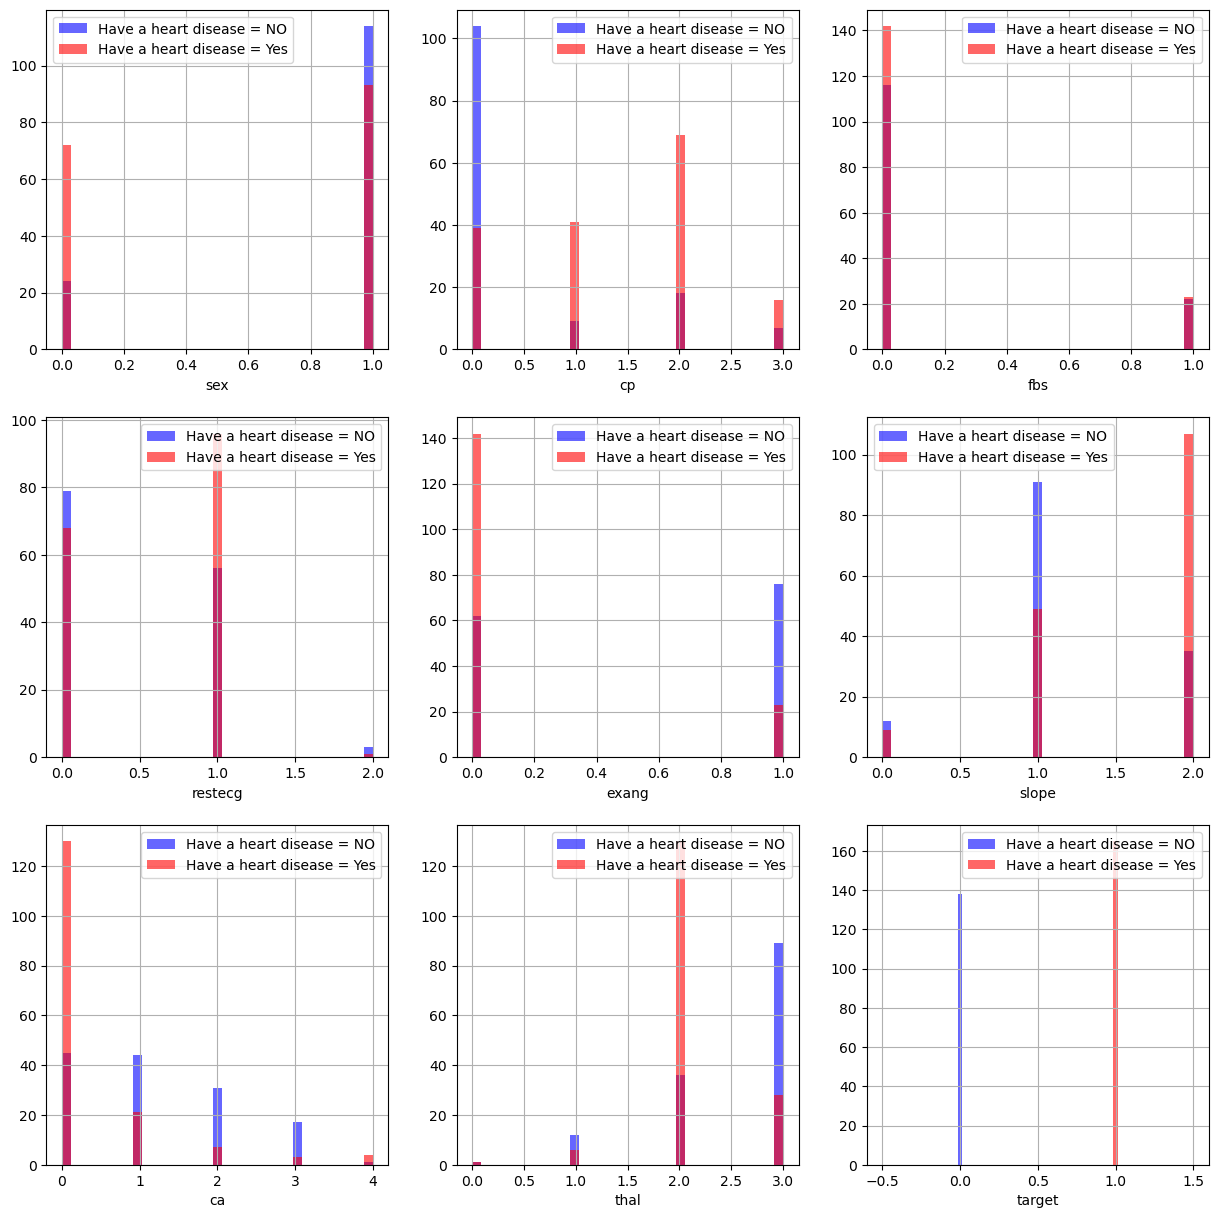

In [15]:
plt.figure(figsize=(15,15))
for i,column in enumerate(categorical_val ,1):
    
    plt.subplot(3,3,i)
    df[df['target']==0][column].hist(bins =35,color ='blue',label ='Have a heart disease = NO', alpha =0.6)
    df[df['target']==1][column].hist(bins =35,color ='red',label ='Have a heart disease = Yes', alpha =0.6)
    plt.legend()
    plt.xlabel(column)

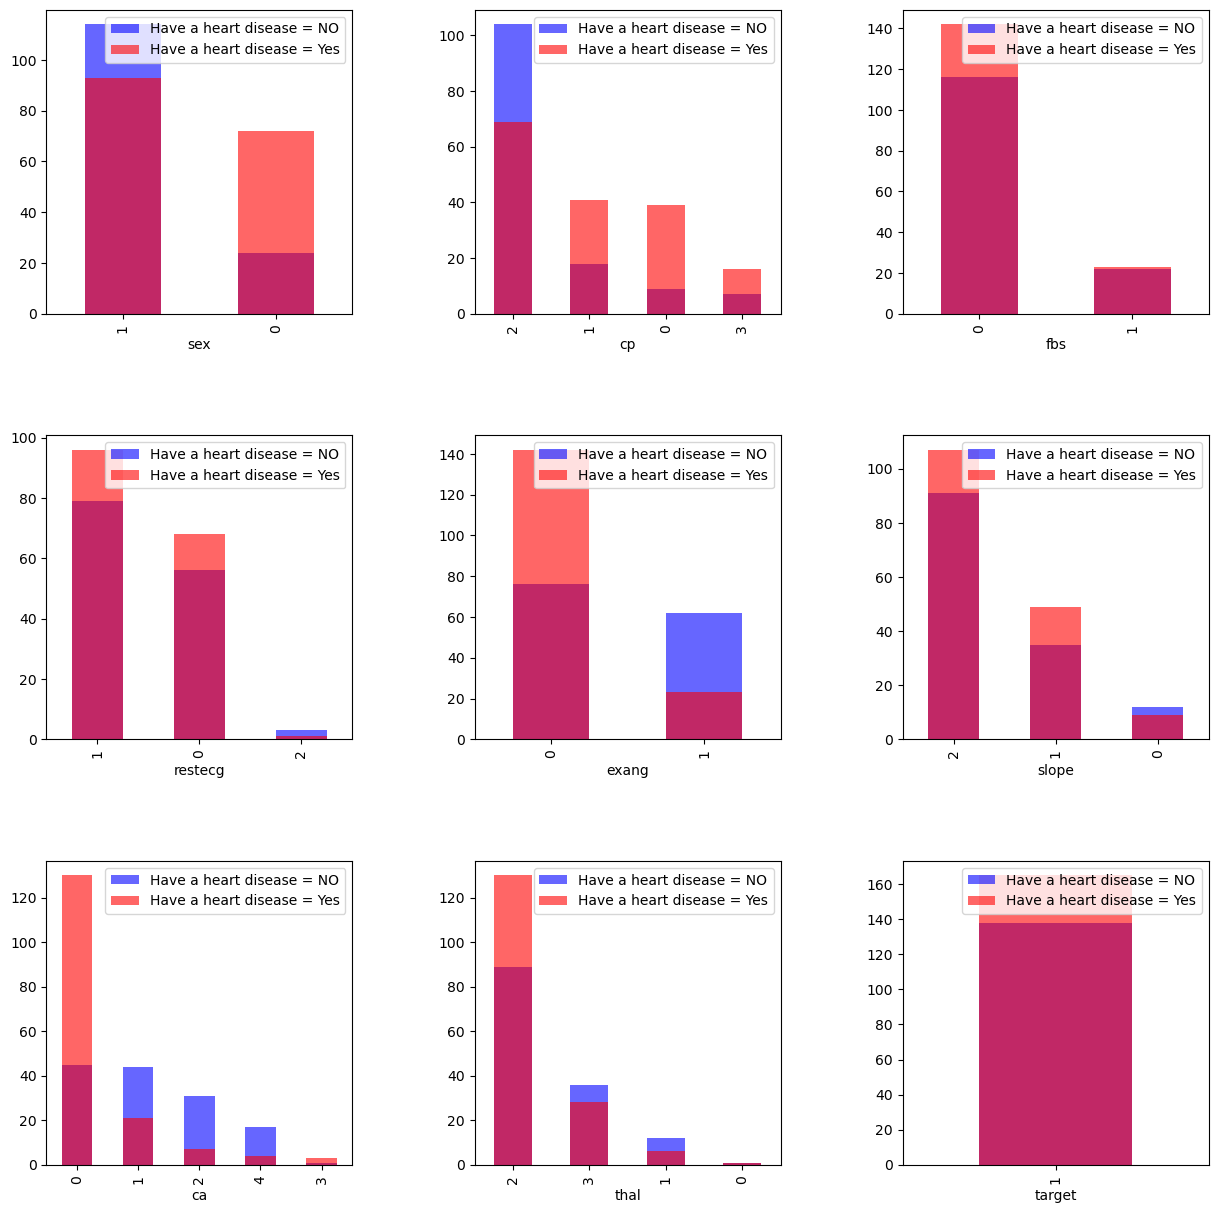

In [16]:
import matplotlib.pyplot as plt

num_cols = 3
num_rows = (len(categorical_val) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(categorical_val):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    df[df['target'] == 0][column].value_counts().plot(kind='bar', color='blue', label='Have a heart disease = NO', alpha=0.6, ax=ax)
    df[df['target'] == 1][column].value_counts().plot(kind='bar', color='red', label='Have a heart disease = Yes', alpha=0.6, ax=ax)
    ax.legend()
    ax.set_xlabel(column)

plt.show()


In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(categorical_val, 1):
    ax = fig.add_subplot(3, 3, i)
    df[df['target'] == 0][column].value_counts().plot(kind='bar', color='blue', label='Have a heart disease = NO', alpha=0.6)
    df[df['target'] == 1][column].value_counts().plot(kind='bar', color='red', label='Have a heart disease = Yes', alpha=0.6)
    ax.legend()
    ax.set_xlabel(column)

plt.savefig('categorical_plots.png')  # Save the plot as an image file
plt.close(fig)  # Close the plot to release memory

print("Categorical plots saved as categorical_plots.png")


Categorical plots saved as categorical_plots.png


## summary
1.cp =patients with a cp of 1,2 and 3 are more likely to have a heart disease than poeple with 0 2.restecg(resting electrocardiograph results(patients with a value of 1 signals wave abnormality are more likely to have a heart disease. 3.exang =(exercise induced angina)-patients with aa vlue 0(No =exercise induced angina)have a heart disease more than patients with 1(Yes =exercise induced angina) 4.slope = {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)). 5.ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease. 6.thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

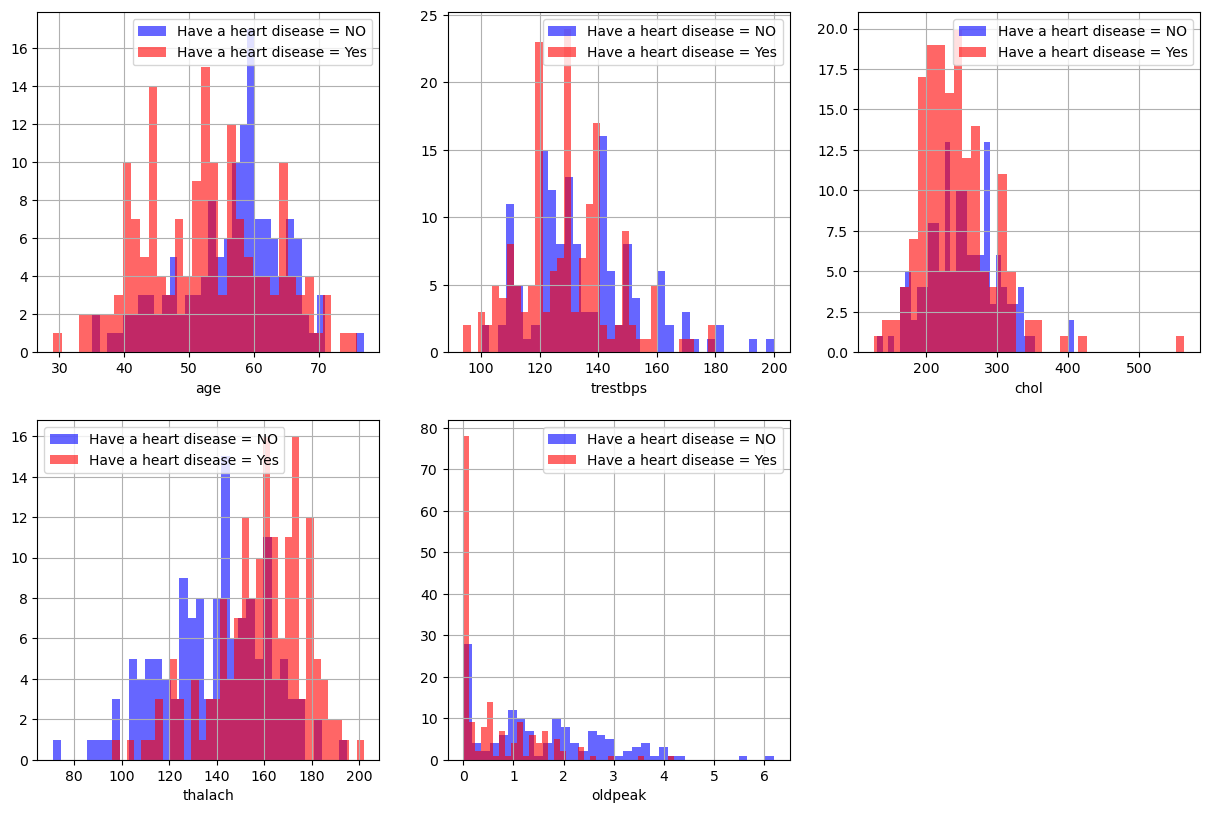

In [18]:
plt.figure(figsize=(15,15))
for i,column in enumerate(continous_val ,1):
    
    plt.subplot(3,3,i)
    df[df['target']==0][column].hist(bins =35,color ='blue',label ='Have a heart disease = NO', alpha =0.6)
    df[df['target']==1][column].hist(bins =35,color ='red',label ='Have a heart disease = Yes', alpha =0.6)
    plt.legend()
    plt.xlabel(column)

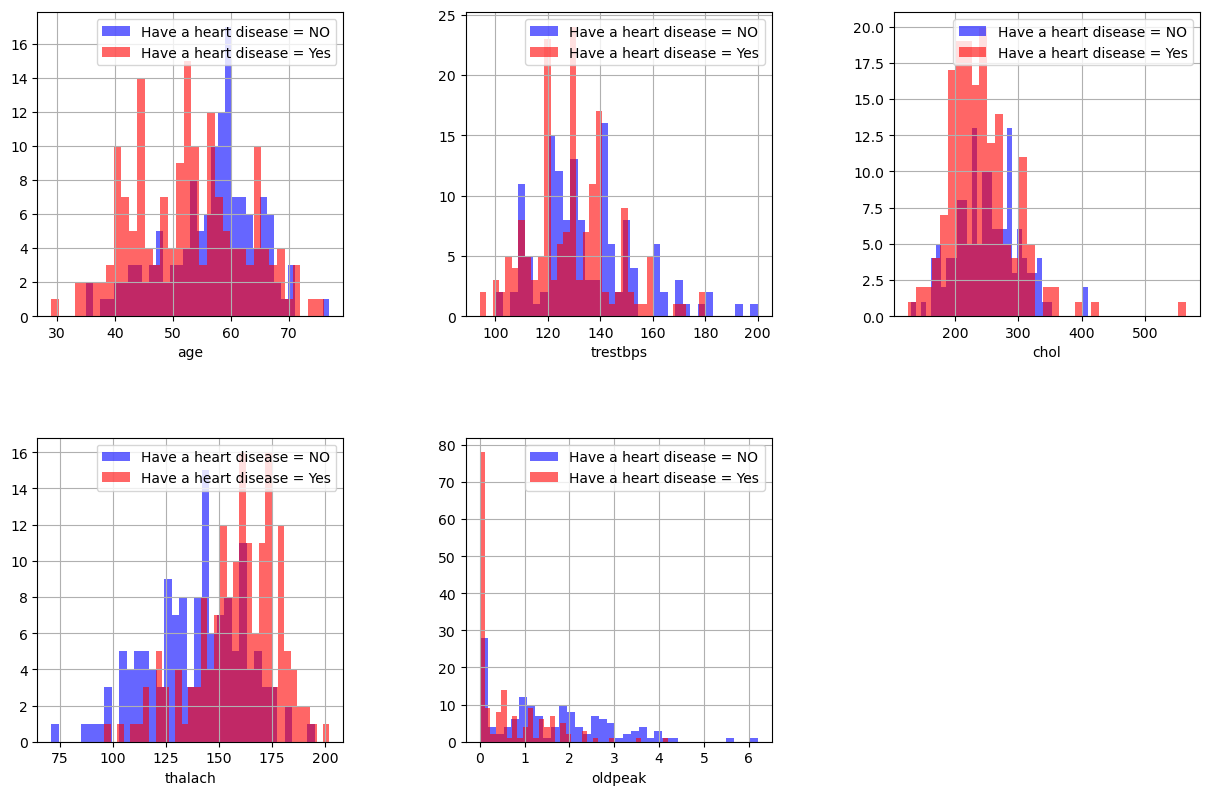

In [38]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df['target'] == 0][column].hist(bins=35, color='blue', label='Have a heart disease = NO', alpha=0.6)
    df[df['target'] == 1][column].hist(bins=35, color='red', label='Have a heart disease = Yes', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.show()


1.trestbps =: resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern 2.{serum cholestoral in mg/dl} : above 200 is cause for concern. 3.thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease. 4.oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

(14.5, -0.5)

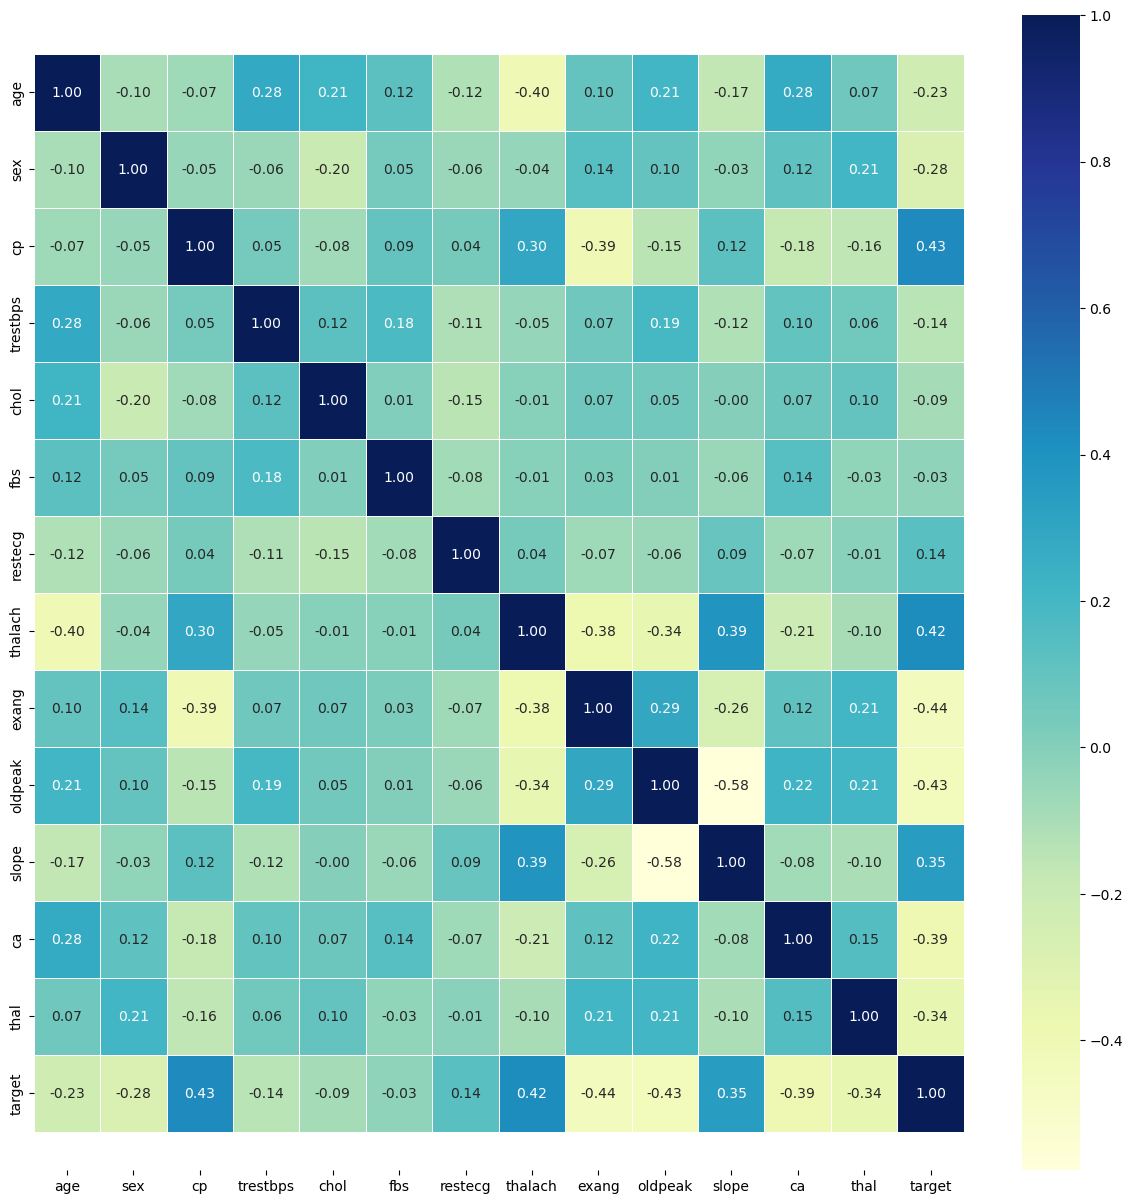

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


From the above heat map we will not be  dropping any columns / we wont be having feature selection since most of our data is actually affecting our target variable.

In the below code we will be determining the X and y (target variable) then we will starndardize our data using standard scaler.We will be training using Random Forest Classifier and we will find the accuracy of the train and test data.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Separate the X and y data
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training set X variables
X_train_standardized = scaler.fit_transform(X_train)

# Transform the test set X variables using the fitted scaler
X_test_standardized = scaler.transform(X_test)

# Create a Random Forest Classifier with specified parameters
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the classifier to the standardized training data
rf_clf.fit(X_train_standardized, y_train)

# Predict the target variable for the standardized test set
y_pred = rf_clf.predict(X_test_standardized)

# Calculate and print the accuracy scores
test_score = accuracy_score(y_test, y_pred) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train_standardized)) * 100

print("Training Accuracy: {:.2f}%".format(train_score))
print("Test Accuracy: {:.2f}%".format(test_score))


Training Accuracy: 100.00%
Test Accuracy: 86.89%


After training the test and train percentages we find that they have a very big diffference. means that our data is overfitting(learns more on our training data such that it cannot predict new data)

### We have the following  parameters to use and tune our model.

n_estimators: This parameter represents the number of decision trees in the random forest. Increasing the number of estimators generally improves the performance of the model but also increases the computational complexity.

max_features: It determines the maximum number of features to consider when looking for the best split at each tree node. It can take different values, such as 'auto' (which considers all features), 'sqrt' (square root of the total number of features), or a specific integer value (e.g., 10 or 20).

max_depth: This parameter specifies the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex relationships in the data, but it can also overfit. Setting it to None allows the trees to grow until all leaves are pure or contain a minimum number of samples.

min_samples_split: It represents the minimum number of samples required to split an internal node. If the number of samples at a node is below this threshold, the node will not be split further, resulting in a leaf node. Setting a higher value can help control overfitting.

min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. If the number of samples at a leaf is below this threshold, the tree builder will attempt to split the parent node. Similar to min_samples_split, setting a higher value can help prevent overfitting.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Define the parameter grid
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Create the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best parameters
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train_standardized, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

# Create the Random Forest Classifier with the best parameters
rf_clf = RandomForestClassifier(**best_params)

# Fit the classifier to the standardized training data
rf_clf.fit(X_train_standardized, y_train)

# Predict the target variable for the standardized test set
y_pred_test = rf_clf.predict(X_test_standardized)

# Calculate and print the accuracy scores
test_score = accuracy_score(y_test, y_pred_test) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train_standardized)) * 100

print("Training Accuracy: {:.2f}%".format(train_score))
print("Test Accuracy: {:.2f}%".format(test_score))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_paramete

Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1100}
Training Accuracy: 88.02%
Test Accuracy: 86.89%


After training we have to implement the grid searchcv to search for the best parameters and after the model searches the best parameters it will fit the parameters in our model and finally we have have the best output and results out of our model. as we can see the train accuracy is 88 % and test  accuracy is almost 87%.uh

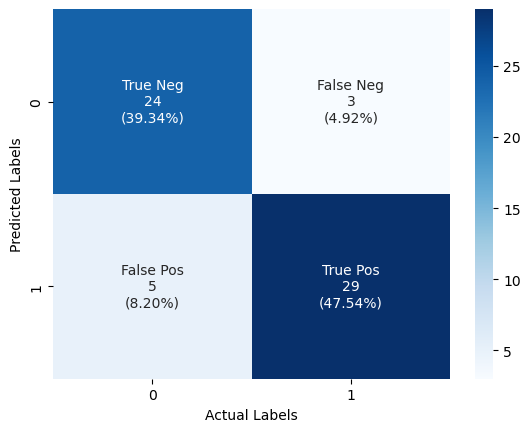

In [49]:
# Generate the confusion matrix plot
def confusion_matrix_plotter(predictions, actuals):
    cf_matrix = confusion_matrix(predictions, actuals)
    group_names = ['True Neg', 'False Neg', 'False Pos', 'True Pos']  # Updated order
    group_counts = [f'{value:0.0f}' for value in cf_matrix.flatten()]
    group_percentages = [f'({value:.2%})' for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.show()

confusion_matrix_plotter(y_pred_test, y_test)


In [47]:
from sklearn.metrics import confusion_matrix

# Predict the target variable for the standardized test set
y_pred_test = rf_clf.predict(X_test_standardized)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[24  5]
 [ 3 29]]


In [48]:
# Calculate and print precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Precision: 0.85
Recall: 0.91
F1-score: 0.88


Precision: 85% of the samples predicted as positive are actually true positives.

Recall: 91% of the actual positive samples are correctly identified by the model.

F1-score: The F1-score is 88%, which represents a balanced measure of precision and recall.

In [50]:
# saving the trained model
import pickle

In [68]:
filename ='model.sav'
pickle.dump(rf_clf ,open(filename,'wb'))

In [77]:
#loading the saved model
load=pickle.load(open('model.sav','rb'))

In [78]:
input_data =(57,0,0,120,34,0,1,163,1,0.6,2,0,2)

#Change the data to a numpy array
input_data_array =np.array(input_data)
#reshape the array as we are only predicting for only one instance
input_data_reshaped  =  input_data_array.reshape(1,-1)
prediction =  load.predict(input_data_reshaped)
print (prediction)
if prediction == 0:
    print('The person is healthy')
else:
    print('The person Has a Heart Disease')

[0]
The person is healthy


In [60]:
import numpy as np
# Assuming you have loaded the model as `loaded_model`

input_data = (67, 5, 3, 145, 233, 1, 0, 56, 0, 2.3, 0, 0, 1)

# Change the data to a numpy array
input_data_array = np.array(input_data)

# Reshape the array as we are only predicting for one instance
input_data_reshaped = input_data_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
    print('The person is healthy')
else:
    print('The person has a Heart Disease')


[0]
The person is healthy


In [61]:
input_data =(41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#Change the data to a numpy array
input_data_array =np.array(input_data)
#reshape the array as we are only predicting for only one instance
input_data_reshaped  =  input_data_array.reshape(1,-1)
prediction =  loaded_model.predict(input_data_reshaped)
print (prediction)
if prediction is 0:
    print('The person is healthy')
else:
    print('The person Has a Heart Disease')

[0]
The person Has a Heart Disease


<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\stilinski\AppData\Local\Temp\ipykernel_4600\163457799.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if prediction is 0:


In [67]:
import numpy as np
# Assuming you have loaded the model as `loaded_model`

input_data = (670, 50, 30, 15, 23, 1, 7, 56, 0, 2.3, 5, 7, 1)

# Change the data to a numpy array
input_data_array = np.array(input_data)

# Reshape the array as we are only predicting for one instance
input_data_reshaped = input_data_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
    print('The person is healthy')
else:
    print('The person has a Heart Disease')


[0]
The person is healthy
